<img src="a20_a21_a22_jaccard.svg" style="text-align:center;width:50%;display:inline;"><img src="a20_a21_a22_partial.svg" style="text-align:center;width:50%;display:inline;">

# New words and changing uses

### New words and changing uses properties:
* __foreign borrowing__ — Borrowing a word from another language. Example: 'cafe latte'
* __compounds__ — When users yoke exisitng words together to create a compound. Examples: 'open house', 'open-minded', 'open-ended', 'political correctness', 'special interests'
* __prefixes/suffixes__ — When prefixes or suffixes change meaning(co-, hyper-, multi-). Examples: 'multimedia', 'hyperpartisan', 'Truman-esque'
* __clipping__ — Making a shorter version of a word. Examples: 'fax from facsimilie', 'porn from pornography', 'app from application'
* __blends__ — Visiblly and phonetically combining terms to create new entities. Examples: 'televangelist (televeision + evangelist)', 'shockumentary (shock + documentary)'
* __conversions__ — Changing a term from one part of speech into another, such as using a noun as a verb. Examples: 'to lame out (lame is originally an adjective)', 'I just texted him (text is originally a noun)'
* __catachresis__ — Borrowing of an available word to designate something that lacks a label. Example: 'spam for unwanted email'
* __acronyms__ — Words formed from the first letters of strings of words. Examples: 'FBI', 'CIA', 'LOL'
* __proper nouns to common nouns__ — Using names of people or products as a general term. Examples: 'kleenex for tissue', 'xerox for copy', 'She is a Mata Hari'
* __analogy__ — When a new word is formed according to the model of another word that is close in meaning. Examples: 'prequel and interequel were formed by analogy from sequel',  'proteonomics', 'genomics'
* __fabrication__ — Totally made up words (often used in advertising). Examples: 'fribble', 'taffy', 'kluge/kludge'
* __onomatopoeia__ — Words that sounds like what they mean. Examples: 'cock-a-doodle-do', 'swish', 'hee-haw'
* __taboo deformation__ — Euphemisms. Examples: 'darn it', 'gee-whiz'
* __doubling__ — Duplication. Examples: 'goody-goody', 'riff-raff', 'sing-song'


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import utils
import importlib
import ast
from tqdm import tqdm
import re

In [2]:
importlib.reload(utils)
connection = utils.connectDB()

In [3]:
FEATURE = "New_words_and_changing_uses"

In [4]:
# IMPORTANT: GPT data was corrected. Read the corrected GPT sheet NOT the database
gpt_df = pd.read_csv("corrected_GPT_min.csv")

In [5]:
# When this data is read in the majority_prop Type is incomaptible with the script downstream, so we just recreate this column each time
gpt_df['majority_prop'] = [list(utils.find_majority(ast.literal_eval(l))[0]) for l in gpt_df['all_properties']]

In [6]:
gpt_df.head()

,sentence_id,all_properties,feature_id,majority_prop
0,265,"[{'simple'}, {'simple'}, {'simple'}, {'simple'...",Aspect,[simple]
1,265,"[{'indicative'}, {'indicative'}, {'indicative'}]",Mood,[indicative]
2,265,[],Verb_choices,[]
3,265,"[{'subordinate'}, {'subordinate', 'adjective'}...",Modifying_clauses,"[subordinate, adjective]"
4,265,"[{'multiplying and embedding modifiers', 'sing...",Modifying_phrases,"[multiplying and embedding modifiers, preposit..."


In [7]:
query = 'select * from annotations where annotator_id in (20,21,22) and completed=1;'
annotations = pd.read_sql(query, connection)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


### Format the human annotations like GPT for making comaprisons
This will roll the annotations up to the sentence level

In [8]:
a_20 = utils.annotationsToGPTFormat(20,annotations)
a_21 = utils.annotationsToGPTFormat(21,annotations)
a_22 = utils.annotationsToGPTFormat(22,annotations)

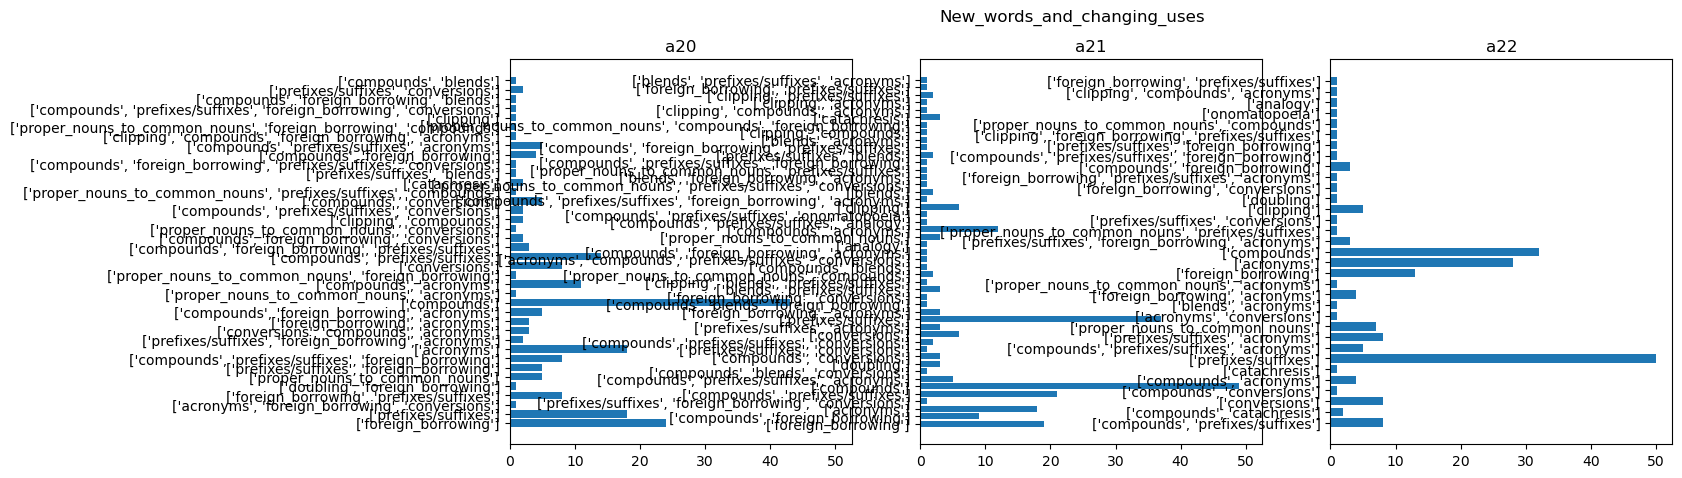

In [9]:
utils.plotPropertyDistributions(FEATURE,a_20,a_21,a_22)

In [10]:
features_gpt = list(gpt_df.groupby('feature_id').agg(list).reset_index()['feature_id'])
idx_gpt = features_gpt.index(FEATURE)
gpt_df_properties = gpt_df.groupby('feature_id').agg(list).reset_index().loc[idx_gpt][['all_properties','sentence_id']]
cGPT = Counter([str(utils.find_majority(ast.literal_eval(l))[0]) for l in gpt_df_properties['all_properties']])

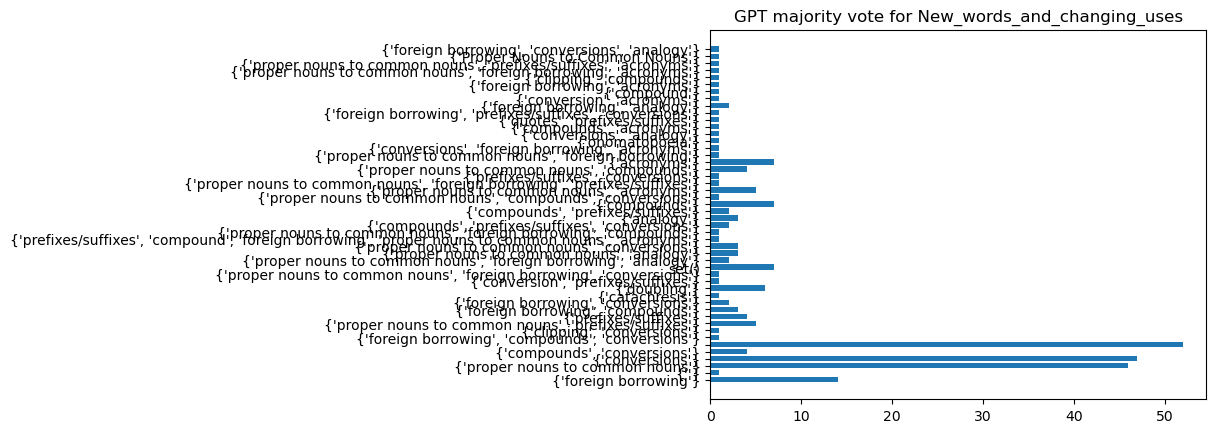

In [11]:
plt.barh(list(cGPT.keys()),list(cGPT.values()))
plt.title("GPT majority vote for "+FEATURE)
plt.show()

### Find all the sentences where there is agreement on the majority property



### Find all the sentences (and the respective annotations) that are not in the agreed sentences list

### Find all sentences

In [12]:
query = 'SELECT id, technique, text FROM ebdb.sample_sentences;'
non_agreed_sentences = pd.read_sql(query, connection)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [13]:
non_agreed_sentences['feature_id'] = FEATURE
non_agreed_sentences['props_a20'] = ''
non_agreed_sentences['props_a21'] = ''
non_agreed_sentences['props_a22'] = ''
non_agreed_sentences['props_gpt'] = ''

In [14]:
non_agreed_sentences = non_agreed_sentences[['id', 'technique', 'text', 'feature_id', 'props_a20', 'props_a21', 'props_a22', 'props_gpt']]
non_agreed_sentences = non_agreed_sentences.rename(columns={'id':'sentence_id'})

In [15]:
print(len(non_agreed_sentences))
non_agreed_sentences.head()

357


,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,props_gpt
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,,,,
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,,,,
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,,,,
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,,,,
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,,,,


In [16]:
utils.fillInAnnotations(non_agreed_sentences,a_20,a_21,a_22,gpt_df,FEATURE)

,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,props_gpt
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,[foreign_borrowing],,"[compounds, prefixes/suffixes]",
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,[prefixes/suffixes],,"[compounds, catachresis]",
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,[foreign_borrowing],[foreign_borrowing],[conversions],
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,[foreign_borrowing],"[compounds, foreign_borrowing]","[compounds, conversions]",
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,"[acronyms, foreign_borrowing, conversions]",[acronyms],"[compounds, acronyms]",
...,...,...,...,...,...,...,...,...
352,14484,[],"They noted Haig's LinkedIn page, which says he...",New_words_and_changing_uses,"[compounds, prefixes/suffixes, acronyms]","[compounds, prefixes/suffixes]",[prefixes/suffixes],"[proper nouns to common nouns, conversions]"
353,14506,[],"When asked about the threats, Haig said, “I’ve...",New_words_and_changing_uses,,,,
354,14878,[],"In 1953, the CIA was in the process of develop...",New_words_and_changing_uses,"[compounds, acronyms]","[compounds, acronyms]","[compounds, acronyms]",[acronyms]
355,15168,[],"“If code is speech, the constitutional contrad...",New_words_and_changing_uses,"[compounds, conversions]",[compounds],[compounds],[conversions]


In [17]:
non_agreed_sentences.to_csv("non_agreed_sentences_"+FEATURE+".csv",index=None)

### Find rows with missing GPT responses

In [18]:
to_reprompt = non_agreed_sentences[non_agreed_sentences['props_gpt']=='']

In [19]:
print(len(to_reprompt))
to_reprompt.head()

101


,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,props_gpt
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,[foreign_borrowing],,"[compounds, prefixes/suffixes]",
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,[prefixes/suffixes],,"[compounds, catachresis]",
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,[foreign_borrowing],[foreign_borrowing],[conversions],
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,[foreign_borrowing],"[compounds, foreign_borrowing]","[compounds, conversions]",
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,"[acronyms, foreign_borrowing, conversions]",[acronyms],"[compounds, acronyms]",


### Reprompt GPT 3 times and merge with non_agreed_sentences

In [24]:
# model = "gpt-3.5-turbo-0301"
# model = "gpt-3.5-turbo-0613"
# model = "gpt-3.5-turbo-1106"
# model = "gpt-4"

In [20]:
import GPT
importlib.reload(GPT)
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/annotation-app/rhetoric-annotation/results/utils.py'>

In [21]:
def parseRes(x):
    try:
        result = utils.parseGPTresponse(x)[1][0]
    except:
        result = []
    return result

for i in range(1,4):
    responses = []
    gpt = GPT.GPT("gpt-3.5-turbo-1106")

    for row in tqdm(to_reprompt.iterrows()):
        sentence = row[1]['text']
        feature = row[1]['feature_id']
        sid = row[1]['sentence_id']
        promt, response = gpt.get_gpt_response(sentence,feature,sid)
        responses.append([sid, response])

    df = pd.DataFrame(responses, columns=['sentence_id','res'+str(i)])
    df['gpt_props'+str(i)] = df['res'+str(i)].apply(parseRes)
    non_agreed_sentences = non_agreed_sentences.merge(df, how='outer',on='sentence_id')
    non_agreed_sentences.to_csv("non_agreed_sentences_"+FEATURE+".csv",index=None)

    print(f"There were {len(gpt.errors)} errors in round {i}.")

101it [22:40, 13.47s/it]


There were 4 errors in round 1.


101it [07:00,  4.17s/it]


There were 1 errors in round 2.


101it [31:59, 19.01s/it]


There were 6 errors in round 3.


In [22]:
# Sanity check
non_agreed_sentences = pd.read_csv("non_agreed_sentences_"+FEATURE+".csv")
print(len(non_agreed_sentences))
non_agreed_sentences.head()

357


,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,props_gpt,res1,gpt_props1,res2,gpt_props2,res3,gpt_props3
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,['foreign_borrowing'],NaN,"['compounds', 'prefixes/suffixes']",NaN,"``` \n\n{\n ""Properties"": [""foreign borrowing...",[],"{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_..."
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,['prefixes/suffixes'],NaN,"['compounds', 'catachresis']",NaN,"{\n ""Properties"": [""compounds"", ""clipping"", ""...","['compounds',_'clipping',_'analogy']","{\n ""Properties"": [""conversion"", ""clipping""],...","['conversion',_'clipping']","{\n ""Properties"": [""foreign borrowing"", ""comp...","['foreign_borrowing',_'compounds',_'conversions']"
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,['foreign_borrowing'],['foreign_borrowing'],['conversions'],NaN,"{\n ""Properties"": [""foreign borrowing"", ""clip...","['foreign_borrowing',_'clipping']","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing""],\n ""...",['foreign_borrowing']
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,['foreign_borrowing'],"['compounds', 'foreign_borrowing']","['compounds', 'conversions']",NaN,"```{\n ""Properties"": [""foreign borrowing"", ""c...",[],"{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing',_'conversions',_'taboo_de...","{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing',_'conversion',_'taboo_def..."
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,"['acronyms', 'foreign_borrowing', 'conversions']",['acronyms'],"['compounds', 'acronyms']",NaN,"```json\n{\n ""Properties"": [""conversions"", ""p...",[],"{\n ""Properties"": [""compounds"", ""conversions""...","['compounds',_'conversions']","{\n ""Properties"": [""compounds"", ""acronyms"", ""...","['compounds',_'acronyms',_'proper_nouns_to_com..."


In [23]:
# get the majority vote from the annotators (props_a20, props_a21, props_a22)

# What to do when there is no majority? NA?


non_agreed_sentences['props_a_majority'] = non_agreed_sentences['props_a20']+", "+\
                                           non_agreed_sentences['props_a21']+", "+\
                                           non_agreed_sentences['props_a22'] #.apply(utils.find_majority)

def convert(x):
    try: result = list(ast.literal_eval(x))
    except: result = [[]]
    return result

non_agreed_sentences['props_a_majority'] = non_agreed_sentences['props_a_majority'].apply(convert)
non_agreed_sentences['props_a_majority'] = non_agreed_sentences['props_a_majority'].apply(lambda l: utils.find_majority(l)[0])

In [24]:
# get the majority vote from the reprompt (gpt_props1, gpt_props2, gpt_props3)

non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences['gpt_props1']+", "+\
                                           non_agreed_sentences['gpt_props2']+", "+\
                                           non_agreed_sentences['gpt_props3'] #.apply(utils.find_majority)

def convert(x):
    try: result = list(ast.literal_eval(x))
    except: result = [[]]
    return result

non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences['props_gpt_majority'].apply(convert)
non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences['props_gpt_majority'].apply(lambda l: utils.find_majority(l)[0])

In [25]:
# Merge the previous gpt props with the newly reprompted ones into a single column
def convert(x):
    try: 
        result = list(ast.literal_eval(x))
        result = [r.replace(" ","_") for r in result]
    except: 
        result = []
    return result

non_agreed_sentences['props_gpt'] = non_agreed_sentences['props_gpt'].apply(convert)
non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences['props_gpt_majority'] + non_agreed_sentences['props_gpt']
non_agreed_sentences = non_agreed_sentences.drop(['props_gpt'], axis=1)


### Calculate agreement between annotator majority and GPT majority

One issue is that when there is no majority the last item is selected

In [26]:
non_agreed_sentences['ann_gpt_agreemnt'] = non_agreed_sentences.apply(lambda x: utils.calcAgreement(x['props_a_majority'],x['props_gpt_majority']), axis=1)

In [27]:
# save the final version
non_agreed_sentences.to_csv("non_agreed_sentences_"+FEATURE+".csv",index=None)

In [28]:
# Sanity check
non_agreed_sentences = pd.read_csv("non_agreed_sentences_"+FEATURE+".csv")
print(len(non_agreed_sentences))
non_agreed_sentences.head()

357


,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,res1,gpt_props1,res2,gpt_props2,res3,gpt_props3,props_a_majority,props_gpt_majority,ann_gpt_agreemnt
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,['foreign_borrowing'],NaN,"['compounds', 'prefixes/suffixes']","``` \n\n{\n ""Properties"": [""foreign borrowing...",[],"{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_...",[],[],1
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,['prefixes/suffixes'],NaN,"['compounds', 'catachresis']","{\n ""Properties"": [""compounds"", ""clipping"", ""...","['compounds',_'clipping',_'analogy']","{\n ""Properties"": [""conversion"", ""clipping""],...","['conversion',_'clipping']","{\n ""Properties"": [""foreign borrowing"", ""comp...","['foreign_borrowing',_'compounds',_'conversions']",[],[],1
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,['foreign_borrowing'],['foreign_borrowing'],['conversions'],"{\n ""Properties"": [""foreign borrowing"", ""clip...","['foreign_borrowing',_'clipping']","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing',_'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing""],\n ""...",['foreign_borrowing'],['foreign_borrowing'],[],-1
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,['foreign_borrowing'],"['compounds', 'foreign_borrowing']","['compounds', 'conversions']","```{\n ""Properties"": [""foreign borrowing"", ""c...",[],"{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing',_'conversions',_'taboo_de...","{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing',_'conversion',_'taboo_def...",['foreign_borrowing'],[],-1
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,"['acronyms', 'foreign_borrowing', 'conversions']",['acronyms'],"['compounds', 'acronyms']","```json\n{\n ""Properties"": [""conversions"", ""p...",[],"{\n ""Properties"": [""compounds"", ""conversions""...","['compounds',_'conversions']","{\n ""Properties"": [""compounds"", ""acronyms"", ""...","['compounds',_'acronyms',_'proper_nouns_to_com...","['acronyms', 'foreign_borrowing', 'conversions']",[],-1


# FIX ALL THE ERRORS
(Majorities are calculated at the list level, not the item level for both annotators and GPT)

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import utils
import importlib
import ast
from tqdm import tqdm
import re

In [2]:
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/annotation-app/rhetoric-annotation/results/utils.py'>

In [3]:
FEATURE = "New_words_and_changing_uses"

In [4]:
non_agreed_sentences = pd.read_csv("non_agreed_sentences_"+FEATURE+".csv")

def parseRes(x):
    try:
        result = utils.parseGPTresponse(x)[1][0]
    except:
        result = []
    return result

for i in range(1,4):
    non_agreed_sentences['gpt_props'+str(i)] = non_agreed_sentences['res'+str(i)].apply(parseRes)

def listOfLists(*lists):
    new_list = []
    for l in lists:
        if len(l):
            new_list.append(l)
    return new_list

non_agreed_sentences['props_gpt_list'] = non_agreed_sentences.apply(lambda x: listOfLists(x['gpt_props1'],
                                                                                          x['gpt_props2'],
                                                                                          x['gpt_props3']), axis=1)
def find_majority(row):
    if len(row.props_gpt_list):
        return utils.find_majority(row.props_gpt_list)[0]
    else:
        return row.props_gpt_majority
    
non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences.apply(lambda x: find_majority(x),axis=1)
non_agreed_sentences = non_agreed_sentences.drop(['props_gpt_list'], axis=1)

# # the old GPT majorities still have spaces. Remove spaces
def replaceSpaces(x):
    if type(x) == str:
        x = ast.literal_eval(x)
    x = [i.replace(" ","_") for i in x]
    return x

non_agreed_sentences['props_gpt_majority'] = non_agreed_sentences['props_gpt_majority'].apply(replaceSpaces)
non_agreed_sentences['ann_gpt_agreemnt'] = non_agreed_sentences.apply(lambda x: utils.calcAgreement(x['props_a_majority'],x['props_gpt_majority']), axis=1)

non_agreed_sentences.to_csv("non_agreed_sentences_"+FEATURE+".csv",index=None)
non_agreed_sentences = pd.read_csv("non_agreed_sentences_"+FEATURE+".csv")


In [5]:
non_agreed_sentences

,sentence_id,technique,text,feature_id,props_a20,props_a21,props_a22,res1,gpt_props1,res2,gpt_props2,res3,gpt_props3,props_a_majority,props_gpt_majority,ann_gpt_agreemnt
0,4,[0 8 9],"Muhammad advises the same thing, according to ...",New_words_and_changing_uses,['foreign_borrowing'],NaN,"['compounds', 'prefixes/suffixes']","``` \n\n{\n ""Properties"": [""foreign borrowing...","['foreign_borrowing', 'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing', 'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing', 'proper_nouns_to_common_...",[],"['foreign_borrowing', 'proper_nouns_to_common_...",-1
1,11,[0 8],We are simply asked to take the pope’s word fo...,New_words_and_changing_uses,['prefixes/suffixes'],NaN,"['compounds', 'catachresis']","{\n ""Properties"": [""compounds"", ""clipping"", ""...","['compounds', 'clipping', 'analogy']","{\n ""Properties"": [""conversion"", ""clipping""],...","['conversion', 'clipping']","{\n ""Properties"": [""foreign borrowing"", ""comp...","['foreign_borrowing', 'compounds', 'conversions']",[],"['compounds', 'clipping', 'analogy']",-1
2,14,[0],Conservative Ben Shapiro told Fox news the ver...,New_words_and_changing_uses,['foreign_borrowing'],['foreign_borrowing'],['conversions'],"{\n ""Properties"": [""foreign borrowing"", ""clip...","['foreign_borrowing', 'clipping']","{\n ""Properties"": [""foreign borrowing"", ""prop...","['foreign_borrowing', 'proper_nouns_to_common_...","{\n ""Properties"": [""foreign borrowing""],\n ""...",['foreign_borrowing'],['foreign_borrowing'],"['foreign_borrowing', 'clipping']",0
3,16,[0],"According to Breitbart, “Sellner, who describe...",New_words_and_changing_uses,['foreign_borrowing'],"['compounds', 'foreign_borrowing']","['compounds', 'conversions']","```{\n ""Properties"": [""foreign borrowing"", ""c...","['foreign_borrowing', 'clipping', 'conversions']","{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing', 'conversions', 'taboo_de...","{\n ""Properties"": [""foreign borrowing"", ""conv...","['foreign_borrowing', 'conversion', 'taboo_def...",['foreign_borrowing'],"['foreign_borrowing', 'clipping', 'conversions']",0
4,23,[0],“This is a clear violation of the Senate Ethic...,New_words_and_changing_uses,"['acronyms', 'foreign_borrowing', 'conversions']",['acronyms'],"['compounds', 'acronyms']","```json\n{\n ""Properties"": [""conversions"", ""p...","['conversions', 'proper_nouns_to_common_nouns']","{\n ""Properties"": [""compounds"", ""conversions""...","['compounds', 'conversions']","{\n ""Properties"": [""compounds"", ""acronyms"", ""...","['compounds', 'acronyms', 'proper_nouns_to_com...","['acronyms', 'foreign_borrowing', 'conversions']","['conversions', 'proper_nouns_to_common_nouns']",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,14484,[],"They noted Haig's LinkedIn page, which says he...",New_words_and_changing_uses,"['compounds', 'prefixes/suffixes', 'acronyms']","['compounds', 'prefixes/suffixes']",['prefixes/suffixes'],NaN,[],NaN,[],NaN,[],"['compounds', 'prefixes/suffixes', 'acronyms']","['proper_nouns_to_common_nouns', 'conversions']",-1
353,14506,[],"When asked about the threats, Haig said, “I’ve...",New_words_and_changing_uses,NaN,NaN,NaN,"{\n ""Properties"": [""clipping"", ""conversion"", ...","['clipping', 'conversion', 'taboo_deformation'...","``` \n ""Properties"": [""clipping""],\n ...",['clipping'],"{\n ""Properties"": [""clipping"", ""conversion""],...","['clipping', 'conversion']",[],"['clipping', 'conversion', 'taboo_deformation'...",-1
354,14878,[],"In 1953, the CIA was in the process of develop...",New_words_and_changing_uses,"['compounds', 'acronyms']","['compounds', 'acronyms']","['compounds', 'acronyms']",NaN,[],NaN,[],NaN,[],"['compounds', 'acronyms']",['acronyms'],0
355,15168,[],"“If code is speech, the constitutional contrad...",New_words_and_changing_uses,"['compounds', 'conver